# **Part2: Code**

## Experimenting with different RNN architecture

In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline

In [ ]:
# /content/Spam Email raw text for NLP.csv
dataset = pd.read_csv('/content/Spam Email raw text for NLP.csv')

In [ ]:
dataset.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [ ]:
dataset.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [ ]:
dataset.head()

,CATEGORY,MESSAGE,FILE_NAME,Number of msg_words
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a,81
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510,161
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216,509
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978,154
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6,309


In [ ]:
#dataset['Category'] = dataset['Category'].map( {'spam': 1, 'ham': 0} )

In [ ]:
dataset['MESSAGE'] = dataset['MESSAGE'].apply(lambda x : x.lower())

In [ ]:
dataset.head()

,CATEGORY,MESSAGE,FILE_NAME,Number of msg_words
0,1,"dear homeowner,\n\n \n\ninterest rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a,81
1,1,attention: this is a must for all computer use...,00373.ebe8670ac56b04125c25100a36ab0510,161
2,1,this is a multi-part message in mime format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216,509
3,1,important information:\n\n\n\nthe new domain n...,00210.050ffd105bd4e006771ee63cabc59978,154
4,1,this is the bottom line. if you can give away...,00033.9babb58d9298daa2963d4f514193d7d6,309


In [ ]:
dataset['MESSAGE'] = dataset['MESSAGE'].apply((lambda x : re.sub('[^a-zA-z0-9\s]', '' , x)))

In [ ]:
dataset['MESSAGE'] = dataset['MESSAGE'].replace(r'\s+|\\n', ' ', regex=True)

In [ ]:
dataset['Number of msg_words'] = dataset['MESSAGE'].apply(lambda x: len(x.split()))

In [ ]:
dataset.head()

,CATEGORY,MESSAGE,FILE_NAME,Number of msg_words
0,1,dear homeowner interest rates are at their low...,00249.5f45607c1bffe89f60ba1ec9f878039a,81
1,1,attention this is a must for all computer user...,00373.ebe8670ac56b04125c25100a36ab0510,151
2,1,this is a multipart message in mime format _ne...,00214.1367039e50dc6b7adb0f2aa8aba83216,465
3,1,important information the new domain names are...,00210.050ffd105bd4e006771ee63cabc59978,154
4,1,this is the bottom line if you can give away c...,00033.9babb58d9298daa2963d4f514193d7d6,302


In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding , LSTM, SpatialDropout1D, SimpleRNN, GRU
from sklearn.model_selection import train_test_split

In [ ]:
dataset = dataset.sample(frac=1)

X = dataset['MESSAGE'].values
y = dataset['CATEGORY'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
max_len = 1000
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size, split=' ')
tokenizer.fit_on_texts(X_train)

encoded_train = tokenizer.texts_to_sequences(X_train)
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(encoded_train, maxlen = max_len)
padding_test = pad_sequences(encoded_test, maxlen=max_len)

In [ ]:
#vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

96371


In [ ]:
print(padded_train[0:2])
print(len(padded_train))

[[   0    0    0 ...   41  275  278]
 [   0    0    0 ... 1799 1233  309]]
4057


In [ ]:
from keras.metrics import activations
# 1) Simple RNN model

model1 = Sequential()
model1.add(Embedding(vocab_size, 64, input_length=max_len))
model1.add(SimpleRNN(64))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
simpleRNN_model = model1.fit(x=padded_train,y=y_train, epochs = 3)

#predict_simpleRNN = model1.predict(padding_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 64)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
127/127 [==============================] - 36s 272ms/step - loss: 0.3573 - accuracy: 0.8491
Epoch 2/3
127/127 [==============================] - 35s 272ms/step - loss: 0.0665 - accuracy: 0.9808
Epoch 3/3
127/127 [==============================] - 35s 275ms/step - loss: 0.0434 - accuracy: 0.9889


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.title(title)

SimpleRNN model accuracy:  0.9522714203565268

               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1164
           1       0.96      0.89      0.93       575

    accuracy                           0.95      1739
   macro avg       0.95      0.94      0.95      1739
weighted avg       0.95      0.95      0.95      1739



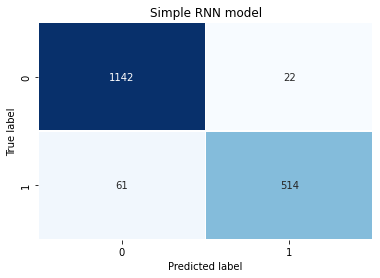

In [ ]:
# Evaluation of SimpleRNN model 
y_pred_simpleRNN = (model1.predict(padding_test) > 0.5).astype("int32")
print("SimpleRNN model accuracy: ", accuracy_score(y_test, y_pred_simpleRNN))
print('\n', classification_report(y_test, y_pred_simpleRNN))
plot_confusion_matrix(y_test, y_pred_simpleRNN, 'Simple RNN model')

In [ ]:
# 2) LSTM model

model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length=max_len))
model2.add(LSTM(64))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
LSTM_model = model2.fit(padded_train, y_train, epochs = 3)

#predict_LSTM = model2.predict(padding_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 64)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
127/127 [==============================] - 81s 626ms/step - loss: 0.2417 - accuracy: 0.8950
Epoch 2/3
127/127 [==============================] - 79s 621ms/step - loss: 0.0324 - accuracy: 0.9921
Epoch 3/3
127/127 [==============================] - 78s 615ms/step - loss: 0.0143 - accuracy: 0.9965


LSTM model accuracy:  0.9861989649223691

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1164
           1       0.99      0.97      0.98       575

    accuracy                           0.99      1739
   macro avg       0.99      0.98      0.98      1739
weighted avg       0.99      0.99      0.99      1739



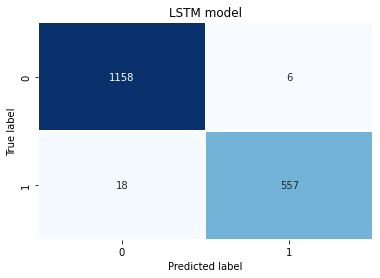

In [ ]:
# Evaluation of LSTM model on TEST dataset
#y_pred_LSTM = get_y_pred(predict_LSTM)

y_pred_LSTM = (model2.predict(padding_test) > 0.5).astype("int32")
print("LSTM model accuracy: ", accuracy_score(y_test, y_pred_LSTM))
print('\n', classification_report(y_test, y_pred_LSTM))
plot_confusion_matrix(y_test, y_pred_LSTM, 'LSTM model')

In [ ]:
# 3) GRU model

model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length=max_len))
model3.add(GRU(64))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
LSTM_model = model3.fit(padded_train, y_train, epochs = 3)

#predict_GRU = model3.predict(padding_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 64)          640000    
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 665,025
Trainable params: 665,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
127/127 [==============================] - 71s 538ms/step - loss: 0.2534 - accuracy: 0.8832
Epoch 2/3
127/127 [==============================] - 69s 543ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 3/3
127/127 [==============================] - 69s 546ms/step - loss: 0.0129 - accuracy: 0.9961


GRU model accuracy:  0.9896492236917769

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1164
           1       1.00      0.97      0.98       575

    accuracy                           0.99      1739
   macro avg       0.99      0.99      0.99      1739
weighted avg       0.99      0.99      0.99      1739



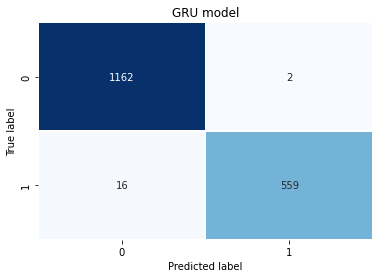

In [ ]:
# Evaluation of GRU model on TEST dataset
#y_pred_GRU = get_y_pred(predict_GRU)

y_pred_GRU = (model3.predict(padding_test) > 0.5).astype("int32")
print("GRU model accuracy: ", accuracy_score(y_test, y_pred_GRU))
print('\n', classification_report(y_test, y_pred_GRU))
plot_confusion_matrix(y_test, y_pred_GRU, 'GRU model')

##Experimenting with input text size (Message length): 

In [ ]:
test_data_len = len(X_test)
print(test_data_len)
print(len(y_test))

1739
1739


In [ ]:
print(type(X_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(len(dataset))

5796


In [ ]:
train = dataset[0 : 4057]
test = dataset[4057 : 5796]
#print(train)
#print(test)
print('Training dataset: \n', train.CATEGORY.value_counts())
print('Test dataset: \n', test.CATEGORY.value_counts())

Training dataset: 
 0    2734
1    1323
Name: CATEGORY, dtype: int64
Test dataset: 
 0    1166
1     573
Name: CATEGORY, dtype: int64


In [ ]:
print('My test dataset:\n', test)

My test dataset:
       CATEGORY                                            MESSAGE  \
3598         0  url httpwwwnewsisfreecomclick183901191717 date...   
2008         0  url httpwwwnewsisfreecomclick184047241717 date...   
5380         0  jim whitehead wrote httpwwwresearchmicrosoftco...   
1348         1  dear computer user jm8675309 html body pfont f...   
3101         0  snip misc rants about finding jobs java vs c w...   
...        ...                                                ...   
1119         1  hr html div bgcolor3dffffcc p align3dcentera h...   
2225         0  url httpwwwnewsisfreecomclick28674045215 date ...   
3921         0  sorry about that didnt think before sending so...   
118          1  html body bgcolorblack leftmargin0 topmargin0 ...   
401          1  free 30 day supply of hgh 1000 look younger an...   

                                   FILE_NAME  Number of msg_words  
3598  02115.ec06cd38c70f03bea7521625fbb3a370                    7  
2008  02161.4b942

In [ ]:
sorted_test_data = test.sort_values(by='MESSAGE' , key=lambda x : x.str.len())
split_len = int(len(sorted_test_data)/3)
print("My 1/3 value of the test instances would be: ", split_len)

short_msg_test = sorted_test_data[ : split_len]
medium_msg_test = sorted_test_data[split_len : 2*split_len]
long_msg_test = sorted_test_data[2*split_len : 3*split_len]

My 1/3 value of the test instances would be:  579


In [ ]:
short_msg_test.head()
short_msg_test['Number of msg_words'].value_counts(ascending=True)
short_msg_test.groupby('CATEGORY').describe()
#short_msg.Category.value_counts
#medium_msg.Category.value_counts
#long_msg.Category.value_counts

Number of msg_words                                               \
                       count       mean        std  min   25%   50%   75%   
CATEGORY                                                                    
0                      482.0  56.574689  29.985021  1.0  31.0  55.5  81.0   
1                       97.0  62.907216  29.403473  7.0  39.0  65.0  86.0   

                 
            max  
CATEGORY         
0         125.0  
1         112.0

In [ ]:
medium_msg_test.head()
medium_msg_test['Number of msg_words'].value_counts(ascending=True)
medium_msg_test.groupby('CATEGORY').describe()

Number of msg_words                                              \
                       count        mean        std   min     25%    50%   
CATEGORY                                                                   
0                      426.0  168.389671  44.700396  85.0  133.25  162.0   
1                      153.0  149.803922  48.145894  17.0  119.00  152.0   

                         
             75%    max  
CATEGORY                 
0         199.75  319.0  
1         171.00  274.0

In [ ]:
long_msg_test.head()
long_msg_test['Number of msg_words'].value_counts(ascending=True)
long_msg_test.groupby('CATEGORY').describe()

Number of msg_words                                                \
                       count        mean          std    min    25%    50%   
CATEGORY                                                                     
0                      257.0  705.280156  1253.642920  195.0  314.0  411.0   
1                      322.0  617.906832   801.478515    9.0  303.0  435.5   

                          
            75%      max  
CATEGORY                  
0         609.0  13059.0  
1         645.5  11370.0

In [ ]:
from nltk.lm.preprocessing import pad_sequence
# Pre-processing the test dataset - short/medium/long before prediction - tokenizing -> encoding & padding

# Encoding -> converting the text into the sequence of numbers
encoded_short = tokenizer.texts_to_sequences(short_msg_test['MESSAGE'])
encoded_medium = tokenizer.texts_to_sequences(medium_msg_test['MESSAGE'])
encoded_long = tokenizer.texts_to_sequences(long_msg_test['MESSAGE'])

# Padding -> maxlength of 1000
padded_short = pad_sequences(encoded_short, maxlen=max_len)
padded_medium = pad_sequences(encoded_medium, maxlen=max_len)
padded_long = pad_sequences(encoded_long, maxlen=max_len)

# Actual true labels from short/medium/long messages
y_test_short = short_msg_test['CATEGORY']
y_test_medium = medium_msg_test['CATEGORY']
y_test_long = long_msg_test['CATEGORY']

print(len(padded_short))
print(len(y_test_short))

579
579


In [ ]:
print(padded_short[0:2])

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 223  97 509]]


SimpleRNN model accuracy on short_messages:  0.9792746113989638

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       482
           1       0.98      0.90      0.94        97

    accuracy                           0.98       579
   macro avg       0.98      0.95      0.96       579
weighted avg       0.98      0.98      0.98       579



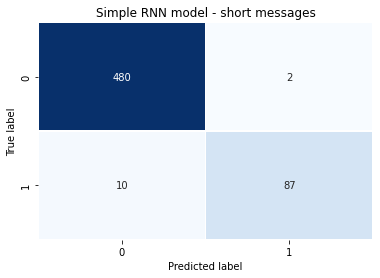

In [ ]:
# Evaluation of simpleRNN on short_message_emails

# Evaluation of SimpleRNN model 
y_pred_simpleRNN_short = (model1.predict(padded_short) > 0.5).astype("int32")
print("SimpleRNN model accuracy on short_messages: ", accuracy_score(y_test_short, y_pred_simpleRNN_short))
print('\n', classification_report(y_test_short, y_pred_simpleRNN_short))
plot_confusion_matrix(y_test_short, y_pred_simpleRNN_short, 'Simple RNN model - short messages')

SimpleRNN model accuracy on medium_messages:  0.9810017271157168

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       426
           1       0.97      0.96      0.96       153

    accuracy                           0.98       579
   macro avg       0.98      0.97      0.98       579
weighted avg       0.98      0.98      0.98       579



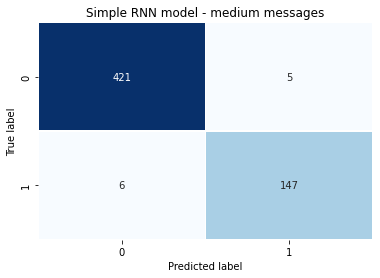

In [ ]:
# Evaluation of simpleRNN on medium_message_emails

# Evaluation of SimpleRNN model 
y_pred_simpleRNN_medium = (model1.predict(padded_medium) > 0.5).astype("int32")
print("SimpleRNN model accuracy on medium_messages: ", accuracy_score(y_test_medium, y_pred_simpleRNN_medium))
print('\n', classification_report(y_test_medium, y_pred_simpleRNN_medium))
plot_confusion_matrix(y_test_medium, y_pred_simpleRNN_medium,'Simple RNN model - medium messages')

SimpleRNN model accuracy on long_messages:  0.9602763385146805

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       257
           1       0.98      0.95      0.96       322

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



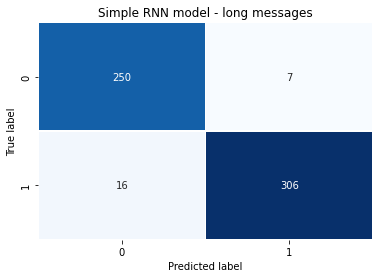

In [ ]:
# Evaluation of simpleRNN on long_message_emails

# Evaluation of SimpleRNN model 
y_pred_simpleRNN_long = (model1.predict(padded_long) > 0.5).astype("int32")
print("SimpleRNN model accuracy on long_messages: ", accuracy_score(y_test_long, y_pred_simpleRNN_long))
print('\n', classification_report(y_test_long, y_pred_simpleRNN_long))
plot_confusion_matrix(y_test_long, y_pred_simpleRNN_long, 'Simple RNN model - long messages')

LSTM model accuracy on short_messages:  0.9948186528497409

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       0.99      0.98      0.98        97

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579



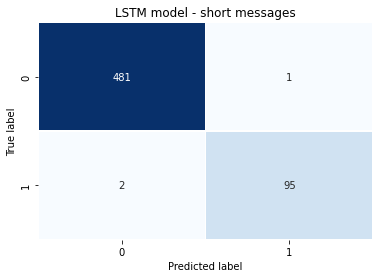

In [ ]:
# Evaluation of LSTM on short_message_emails

# Evaluation of LSTM model 
y_pred_LSTM_short = (model2.predict(padded_short) > 0.5).astype("int32")
print("LSTM model accuracy on short_messages: ", accuracy_score(y_test_short, y_pred_LSTM_short))
print('\n', classification_report(y_test_short, y_pred_LSTM_short))
plot_confusion_matrix(y_test_short, y_pred_LSTM_short, 'LSTM model - short messages')

LSTM model accuracy on medium_messages:  0.9896373056994818

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       426
           1       0.98      0.98      0.98       153

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579



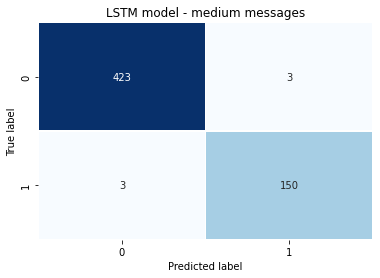

In [ ]:
# Evaluation of LSTM on medium_message_emails

# Evaluation of LSTM model 
y_pred_LSTM_medium = (model2.predict(padded_medium) > 0.5).astype("int32")
print("LSTM model accuracy on medium_messages: ", accuracy_score(y_test_medium, y_pred_LSTM_medium))
print('\n', classification_report(y_test_medium, y_pred_LSTM_medium))
plot_confusion_matrix(y_test_medium, y_pred_LSTM_medium, 'LSTM model - medium messages')

LSTM model accuracy on long_messages:  0.9896373056994818

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       257
           1       1.00      0.98      0.99       322

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579



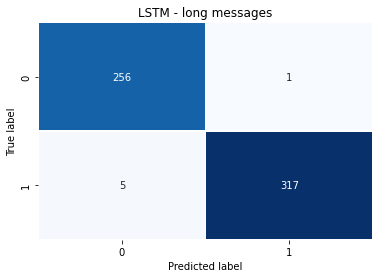

In [ ]:
# Evaluation of LSTM on long_message_emails

# Evaluation of LSTM model 
y_pred_LSTM_long = (model2.predict(padded_long) > 0.5).astype("int32")
print("LSTM model accuracy on long_messages: ", accuracy_score(y_test_long, y_pred_LSTM_long))
print('\n', classification_report(y_test_long, y_pred_LSTM_long))
plot_confusion_matrix(y_test_long, y_pred_LSTM_long, 'LSTM - long messages')

GRU model accuracy on short_messages:  0.9965457685664939

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       1.00      0.98      0.99        97

    accuracy                           1.00       579
   macro avg       1.00      0.99      0.99       579
weighted avg       1.00      1.00      1.00       579



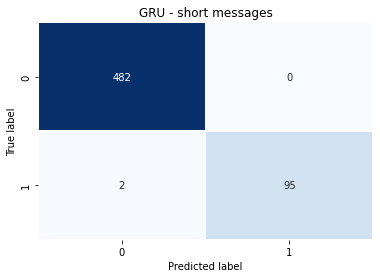

In [ ]:
# Evaluation of GRU on short_message_emails

# Evaluation of GRU model 
y_pred_GRU_short = (model3.predict(padded_short) > 0.5).astype("int32")
print("GRU model accuracy on short_messages: ", accuracy_score(y_test_short, y_pred_GRU_short))
print('\n', classification_report(y_test_short, y_pred_GRU_short))
plot_confusion_matrix(y_test_short, y_pred_GRU_short, 'GRU - short messages')

GRU model accuracy on medium_messages:  0.9965457685664939

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      0.99      0.99       153

    accuracy                           1.00       579
   macro avg       1.00      0.99      1.00       579
weighted avg       1.00      1.00      1.00       579



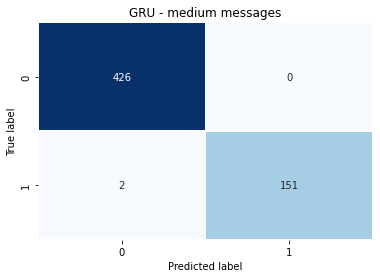

In [ ]:
# Evaluation of GRU on medium_message_emails

# Evaluation of GRU model 
y_pred_GRU_medium = (model3.predict(padded_medium) > 0.5).astype("int32")
print("GRU model accuracy on medium_messages: ", accuracy_score(y_test_medium, y_pred_GRU_medium))
print('\n', classification_report(y_test_medium, y_pred_GRU_medium))
plot_confusion_matrix(y_test_medium, y_pred_GRU_medium, 'GRU - medium messages')

GRU model accuracy on long_messages:  0.9913644214162349

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       257
           1       0.99      0.99      0.99       322

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579



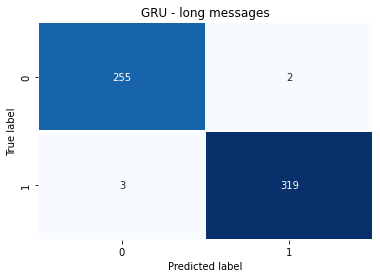

In [ ]:
# Evaluation of GRU on long_message_emails

# Evaluation of GRU model 
y_pred_GRU_long = (model3.predict(padded_long) > 0.5).astype("int32")
print("GRU model accuracy on long_messages: ", accuracy_score(y_test_long, y_pred_GRU_long))
print('\n', classification_report(y_test_long, y_pred_GRU_long))
plot_confusion_matrix(y_test_long, y_pred_GRU_long, 'GRU - long messages')